In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as int
from scipy import signal

#### Euler

Text(0, 0.5, 'phi')

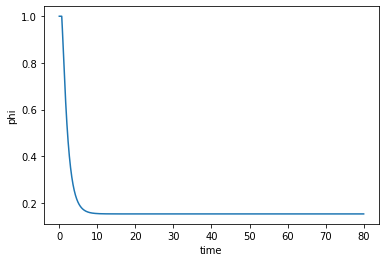

In [50]:
no = 1000
max_time = 80

#For a capillary. 
optimised_value_tau = 2.292929292929293
phi_min_baseline = 0.153
DELAY = 8

f = pd.Series(np.zeros(no))
f[0] = 0.2
t = np.linspace(0,max_time,no)
phi = pd.Series(np.zeros(no))
phi[0] = 1
phi_min = pd.Series(np.zeros(no))
phi_min[0] = phi_min_baseline
dphidt = pd.array(np.zeros(no))

phi_delayed = pd.Series(np.ones(DELAY)).append(phi).reset_index().drop('index', axis=1)

dt = max_time/(no-1)
n=-1

for i in range(no-1):
    dphidt[i] = (1/optimised_value_tau)*( -phi_delayed.iloc[i][0] + f[i]*(1-phi_min[i]) + phi_min[i] )
    phi_delayed.iloc[DELAY+i+1][0] = dphidt[i]*dt + phi_delayed.iloc[DELAY+i][0]
    f[i+1] = f[0]*(phi_delayed.iloc[DELAY+i+1][0]**4)
    phi_min[i+1] = 1-(1-phi_min_baseline)*(1-f[i+1])**n

#n=1
#phi_min = 1 - (1 - phi_min_baseline)*(1-f)**n
#initial condition

# plot results
plt.plot(t,phi_delayed[0:len(t)])
plt.xlabel('time')
plt.ylabel('phi')

In [44]:
egg = phi_delayed.iloc[2][0]
egg

1.0

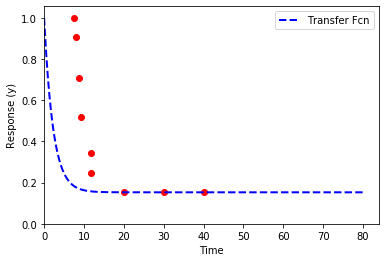

In [8]:
points = pd.DataFrame({'t': [7.62,8.08,8.69,9.22,11.73,11.85,20,30,40], 'd': [1,0.906,0.706,0.52,0.346,0.247,0.153,0.153,0.153]})

plt.figure(1)
plt.plot(t,phi,'b--',linewidth=2,label='Transfer Fcn')
plt.scatter(points['t'],points['d'], color='r')
plt.xlabel('Time')
plt.ylabel('Response (y)')
plt.ylim(0)
plt.xlim(0)
plt.legend(loc='best')
plt.show()

Text(0, 0.5, 'f')

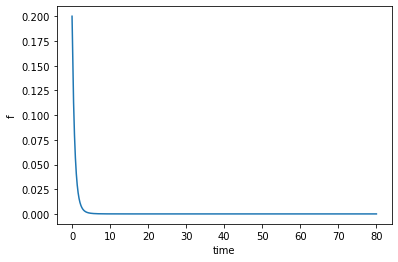

In [9]:
# plot results
plt.plot(t,f)
plt.xlabel('time')
plt.ylabel('f')

#### Try odeint with the extra functions in model

ValueError: x and y must have same first dimension, but have shapes (50,) and (4, 50)

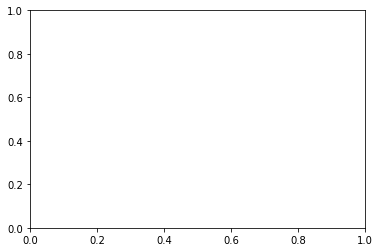

In [13]:
#For a capillary. 
D_baseline = 8 # micro m 
F_baseline = 0.008663
optimised_value_tau = 2.292929292929293
phi_min_baseline = 0.153

no = 1000
n=-1

def model(phi,t):
    f = f_0*(phi**4)
    phi_min = 1-(1-phi_min_baseline)*(1-f)**n
    dphidt = (1/optimised_value_tau)*( -phi + f*(1-phi_min) + phi_min )
    return dphidt

f = pd.Series(np.zeros(no))
#phi = pd.Series(np.zeros(no))
phi_min = pd.Series(np.zeros(no))


f[0] = 0.2
f_0 = f[0]
#phi[0] = 1
phi_min[0] = phi_min_baseline
phi_0 = [1,1,1,1]

t = np.linspace(0,40)
#phi_0 = np.zeros(no) + 1 #temp


#solve ODE
phi = int.solve_ivp(model,t,phi_0)

#phi_min = 1 - (1 - phi_min_baseline)*(1-f)**n
    
# plot results
plt.plot(phi['t'],phi['y'][0])
# plt.xlabel('time')
# plt.ylabel('phi')

In [27]:
phi_delayed.reset_index().drop('index', axis=1)

,0
0,1.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
1003,0.0
1004,0.0
1005,0.0
1006,0.0


In [26]:
phi_delayed.reset_index()

,index,0
0,0,1.0
1,1,1.0
2,2,1.0
3,3,1.0
4,4,1.0
...,...,...
1003,995,0.0
1004,996,0.0
1005,997,0.0
1006,998,0.0
